# Dominik Sawicki 145402, Sebastian Szczepaniak 145280
## Grupa 7.1

In [125]:
from skimage import io, filters, color, morphology, feature
import matplotlib.pyplot as plt
import os

task_1_path = './images/zad1/'
task_2_path = './images/zad2/'

# Zadanie na 3.0

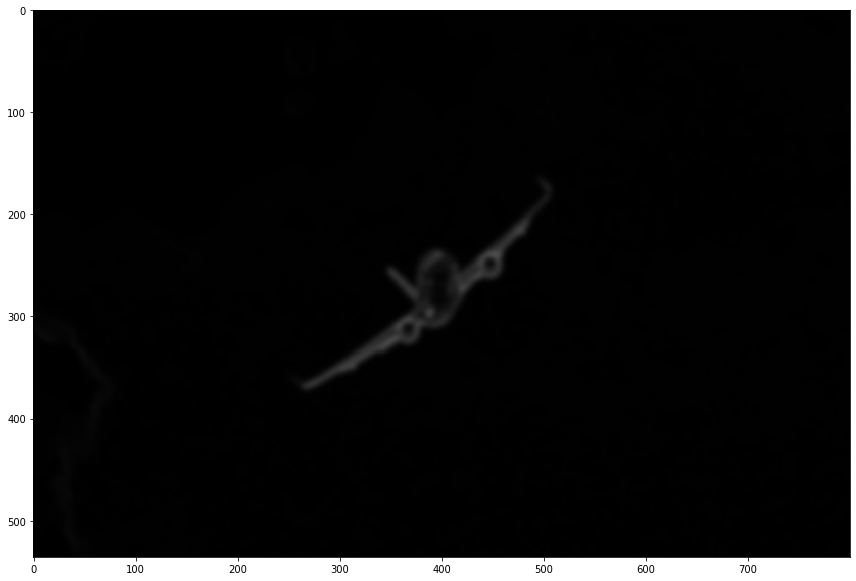

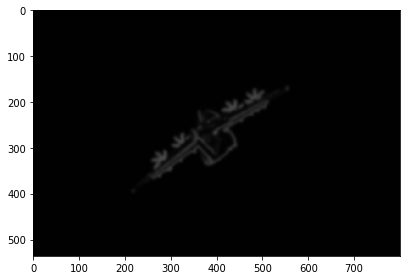

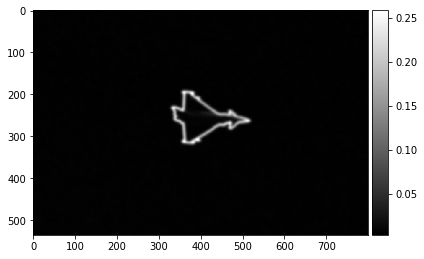

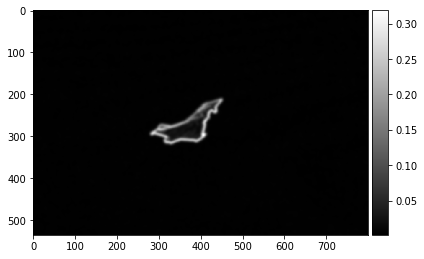

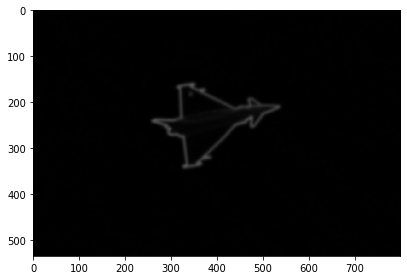

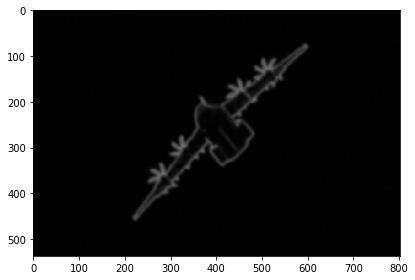

In [161]:
plt.figure(figsize=(12, 12))
for i, file in enumerate(os.listdir(task_1_path), start=1):
    img = io.imread(f'{task_1_path}{file}')
    img_gray = color.rgb2gray(img)
#     img_gray = filters.gaussian(img_gray, sigma=2)
    img_gray = filters.sobel(img_gray)
#     img_gray = filters.sobel(img_gray)
    img_gray = morphology.dilation(img_gray)
    img_gray = filters.gaussian(img_gray, sigma=3)
    io.imshow(img_gray, cmap=plt.cm.gray)
    plt.show()